In [1]:
cd ../..

/Users/danil/Documents/github


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image, ImageDraw
import json
import tqdm
import glob
import os
import json

import tensorflow as tf
from collections import Counter, defaultdict

2023-02-22 20:33:55.244867: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from clay.utils.plot_UI import element, draw, SCREEN_SIZE, plot_img_from_tf, plot_img_raw_dataset

In [4]:
filenames = glob.glob('/Users/danil/Documents/github/clay/combined/*.json')
len(filenames)

66261

# draw data

In [73]:
#filenames = [filename]
raw_dataset = tf.data.TFRecordDataset('./clay/tfrecords/train.record')

In [5]:
raw_filtered_dataset = tf.data.TFRecordDataset('./clay/tfrecords/train_filter.record')

2023-02-16 20:20:24.578488: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
raw_filtered_dataset = tf.data.TFRecordDataset('./clay/tfrecords/train_v2.record')

18757
3741.jpg
Counter({b'BUTTON': 14, b'TEXT': 3, b'IMAGE': 1, b'SLIDER': 1})


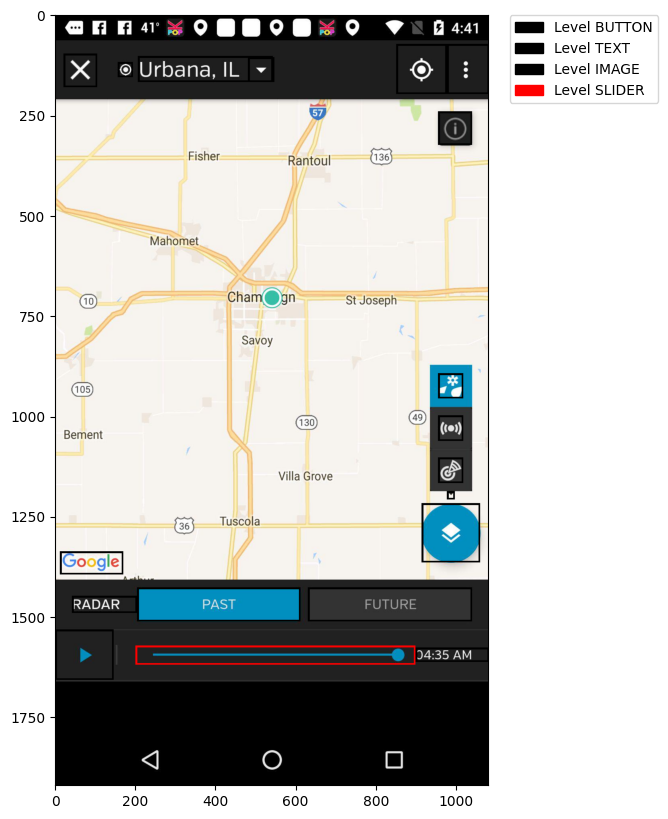

In [6]:
# highlight with red specific class
N = plot_img_from_tf(raw_filtered_dataset, label_to_plot = 'SLIDER', N = 18757)

In [ ]:
# images with more than 100 obj
[3327, 7896, 10323, 10587, 11314, 11675,
 13399, 14605, 22391, 24725, 27145, 29827, 30371, 30669, 30715, 30891, 35714, 35720, 39726]

# images with big text

1507, 9938, 8458, 7119, 5946

8854, 40791 (text in text)

3287 text in button

13069 just 2 text, button

max 41407 in v2 dataset

1. convert small images to buttons (check it)
2. remove date_picker

In [75]:
# plot random image
N = plot_img_from_tf(raw_filtered_dataset)

43936


7119
20932.jpg
Counter({b'TEXT': 2, b'CONTAINER': 1, b'TOOLBAR': 1, b'PICTOGRAM': 1})


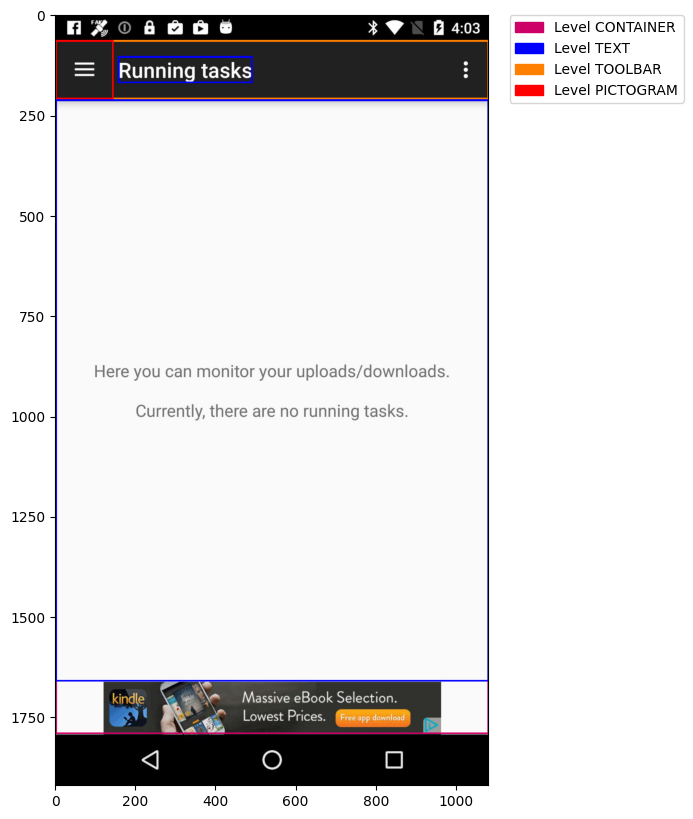

In [74]:
N = plot_img_from_tf(raw_dataset, N = 7119)

In [19]:
plot_img_raw_dataset(N)

None


FileNotFoundError: [Errno 2] No such file or directory: '/Users/danil/Documents/github/clay/image/None.jpg'

In [ ]:
# this is how to find nodes
files = os.listdir('./clay/combined')

with open('./clay/combined/57896.json', "r", encoding="UTF-8") as f:
    data = json.load(f)
    
print(child.keys())

child['pointer']

# examples for every class

In [39]:
examples = {}
label_map = {}
for tf_rec_ind, raw_record in enumerate(raw_filtered_dataset.take(1000)):
    ex = tf.train.Example()
    ex.ParseFromString(raw_record.numpy())
    result = {}
    # example.features.feature is the dictionary
    for key, feature in ex.features.feature.items():
      # The values are the Feature objects which contain a `kind` which contains:
      # one of three fields: bytes_list, float_list, int64_list

        kind = feature.WhichOneof('kind')
        result[key] = np.array(getattr(feature, kind).value)

    
    objcts = [i.decode('UTF-8') for i in result['image/object/class/text']]
    label = [i for i in result['image/object/class/label']]
    img_name = result['image/filename'][0].decode('UTF-8')
    
    for obj in objcts:
        if obj not in examples:
            examples[obj] = [tf_rec_ind, img_name.split('.')[0]]
            obj_ind = objcts.index(obj)
            label_map[obj] = obj_ind
        else:
            continue
    
    #print(img_name)

In [40]:
len(examples), examples

(10,
 {'TEXT': [0, '10'],
  'IMAGE': [0, '10'],
  'BUTTON': [0, '10'],
  'TEXT_INPUT': [5, '10005'],
  'CHECK_BOX': [6, '1001'],
  'MAP': [18, '10023'],
  'SWITCH': [18, '10023'],
  'PAGER_INDICATOR': [42, '10057'],
  'SLIDER': [100, '10123'],
  'DATE_PICKER': [276, '10309']})

# plot every example

0
TEXT
0
10.jpg
Counter({b'TEXT': 14, b'BUTTON': 14, b'IMAGE': 3})


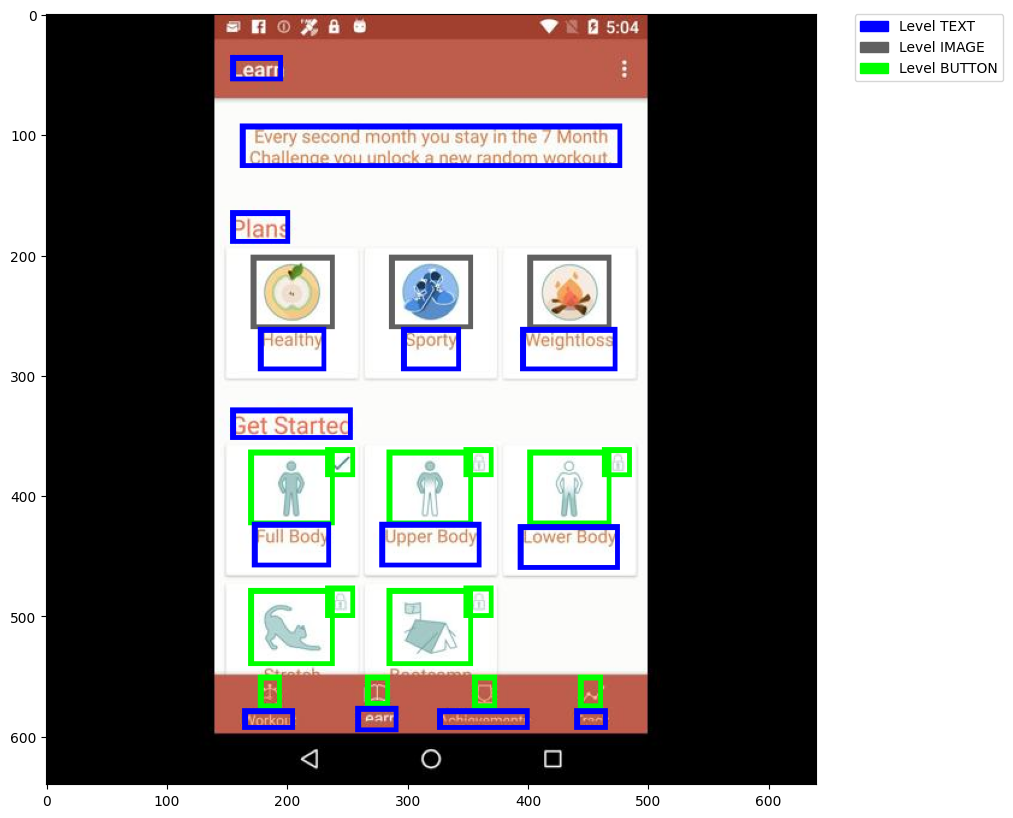

IMAGE
BUTTON
5
TEXT_INPUT
5
10005.jpg
Counter({b'TEXT': 9, b'BUTTON': 4, b'TEXT_INPUT': 1})


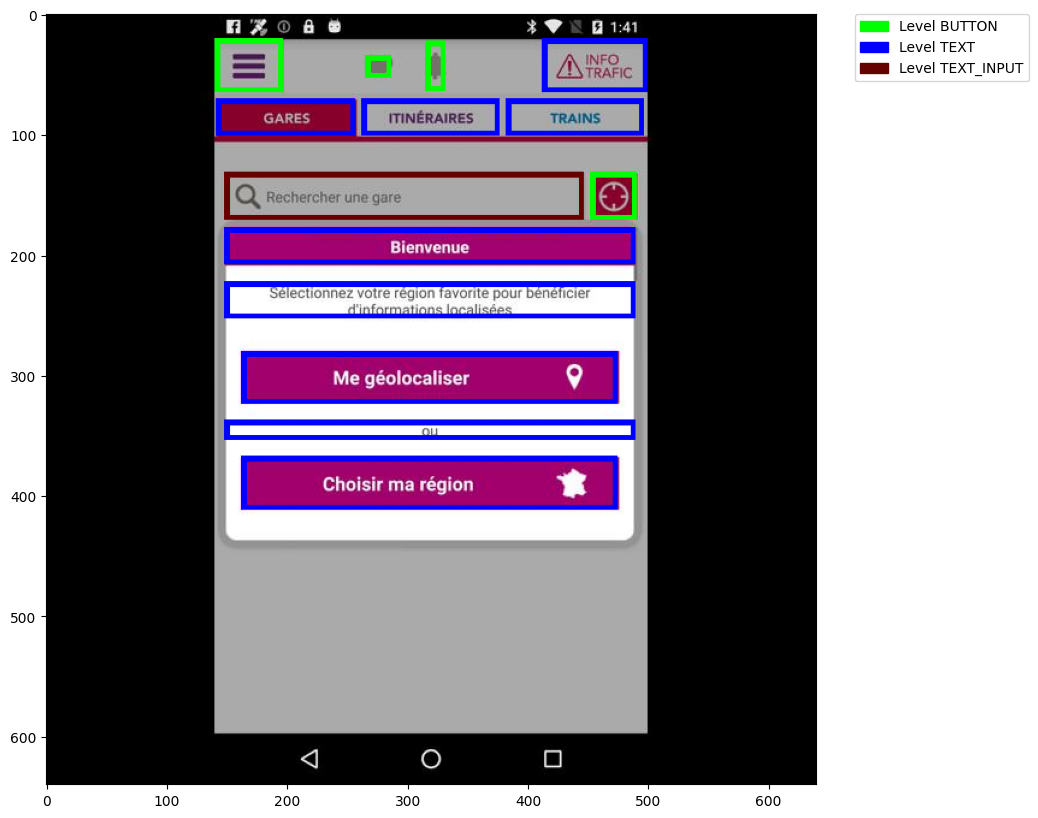

6
CHECK_BOX
6
1001.jpg
Counter({b'TEXT': 12, b'BUTTON': 5, b'TEXT_INPUT': 1, b'CHECK_BOX': 1})


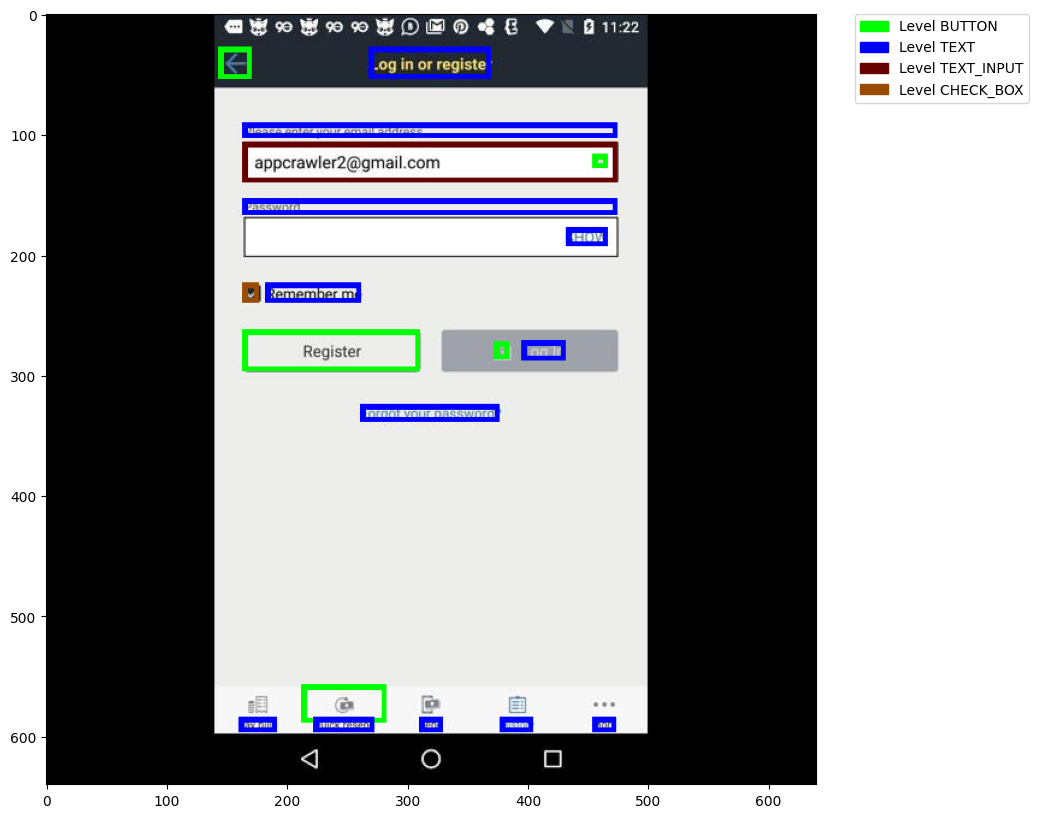

18
MAP
18
10023.jpg
Counter({b'BUTTON': 4, b'TEXT': 3, b'SWITCH': 2, b'MAP': 1, b'IMAGE': 1})


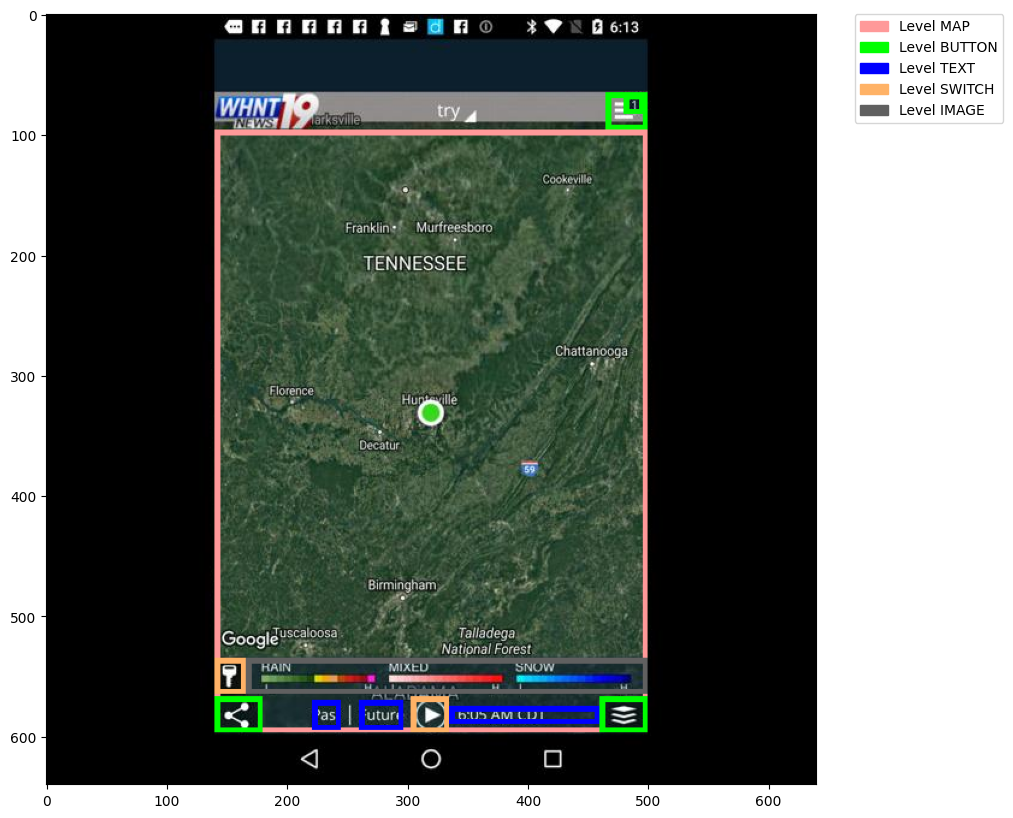

SWITCH
42
PAGER_INDICATOR
42
10057.jpg
Counter({b'BUTTON': 4, b'TEXT_INPUT': 1, b'TEXT': 1, b'PAGER_INDICATOR': 1})


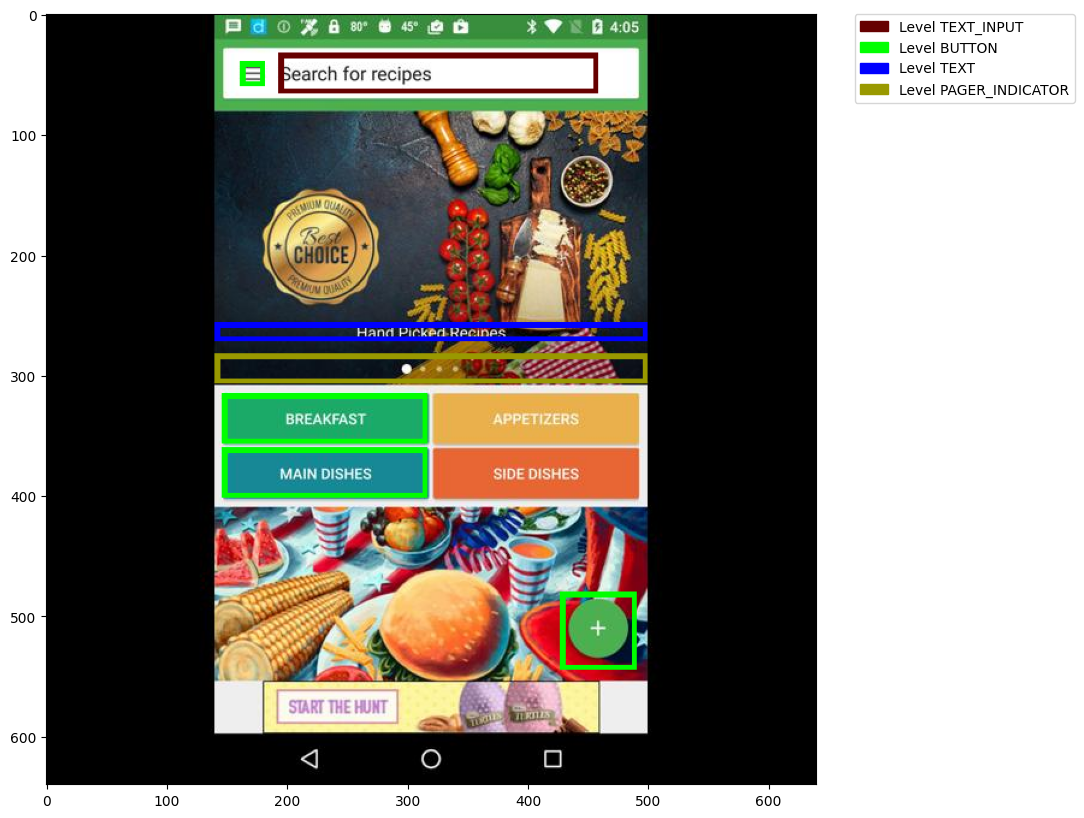

100
SLIDER
100
10123.jpg
Counter({b'TEXT': 15, b'BUTTON': 8, b'CHECK_BOX': 1, b'SLIDER': 1, b'IMAGE': 1})


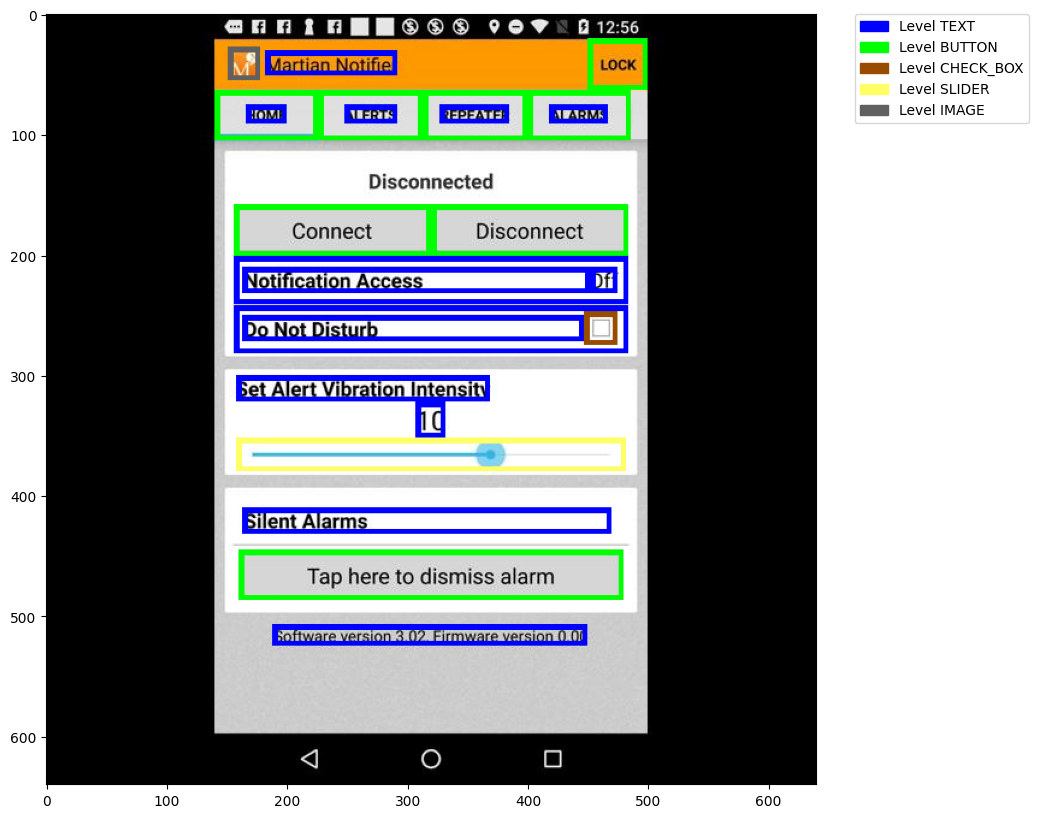

276
DATE_PICKER
276
10309.jpg
Counter({b'TEXT_INPUT': 8, b'TEXT': 5, b'DATE_PICKER': 1, b'SWITCH': 1, b'CHECK_BOX': 1, b'BUTTON': 1})


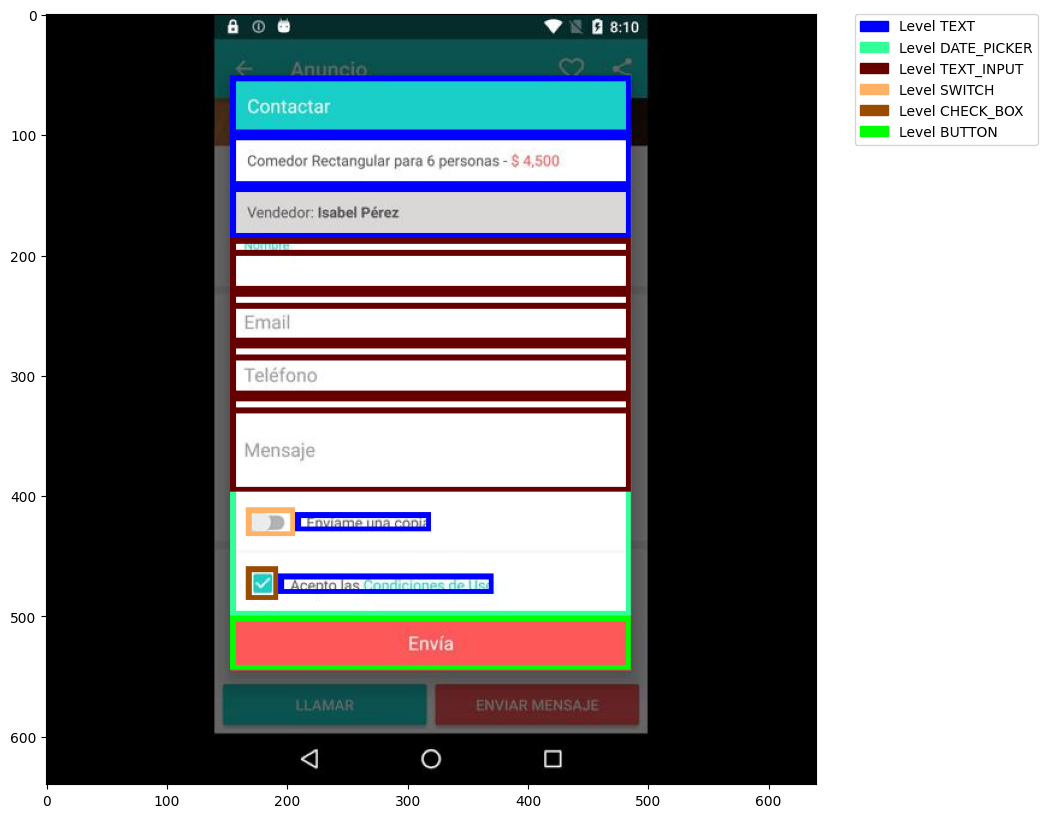

In [41]:
prev_v = []
for k, v in examples.items():
    
    if v == prev_v:
        print(k)
        plt.show()
        continue
    else:
        print(v[0])
        print(k)
        prev_v = v
        N = plot_img_from_tf(raw_filtered_dataset, N = prev_v[0])
        plt.show()  
  

276
10309.jpg
Counter({b'TEXT_INPUT': 8, b'TEXT': 5, b'DATE_PICKER': 1, b'SWITCH': 1, b'CHECK_BOX': 1, b'BUTTON': 1})


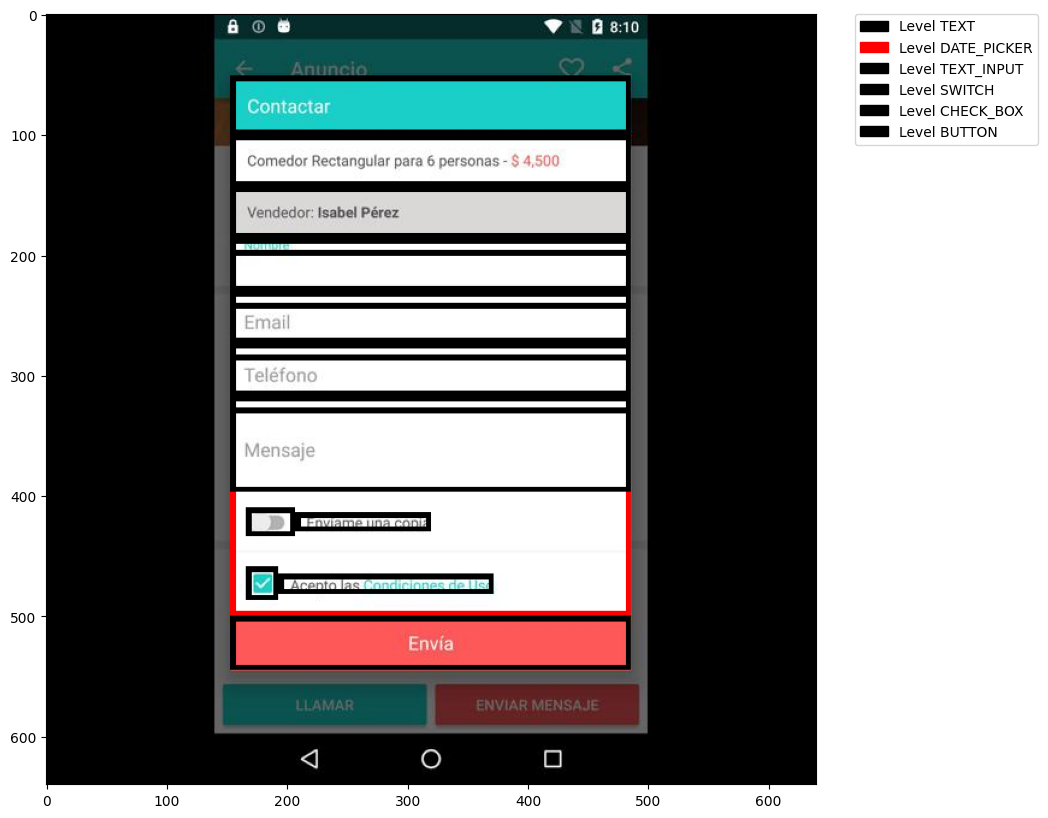

In [42]:
N = plot_img_from_tf(raw_filtered_dataset, label_to_plot = 'DATE_PICKER', N = 276)

# plot several examples per class

In [43]:
def check_more_examples(name, num, skip = 1):
    i = 0
    inds = []
    print(skip)
    for tf_rec_ind, raw_record in enumerate(raw_filtered_dataset.skip(skip).take(10000)):
        ex = tf.train.Example()
        ex.ParseFromString(raw_record.numpy())
        result = {}
        # example.features.feature is the dictionary
        for key, feature in ex.features.feature.items():
          # The values are the Feature objects which contain a `kind` which contains:
          # one of three fields: bytes_list, float_list, int64_list

            kind = feature.WhichOneof('kind')
            result[key] = np.array(getattr(feature, kind).value)


        objcts = [i.decode('UTF-8') for i in result['image/object/class/text']]
        img_name = result['image/filename'][0].decode('UTF-8')

        if name in objcts:
            inds.append(tf_rec_ind + skip)
            i += 1
                
        if i == num:
            return inds


In [76]:
inds = check_more_examples('IMAGE', 15)

1


1
1000.jpg
Counter({b'BUTTON': 4, b'TEXT': 4, b'IMAGE': 1})


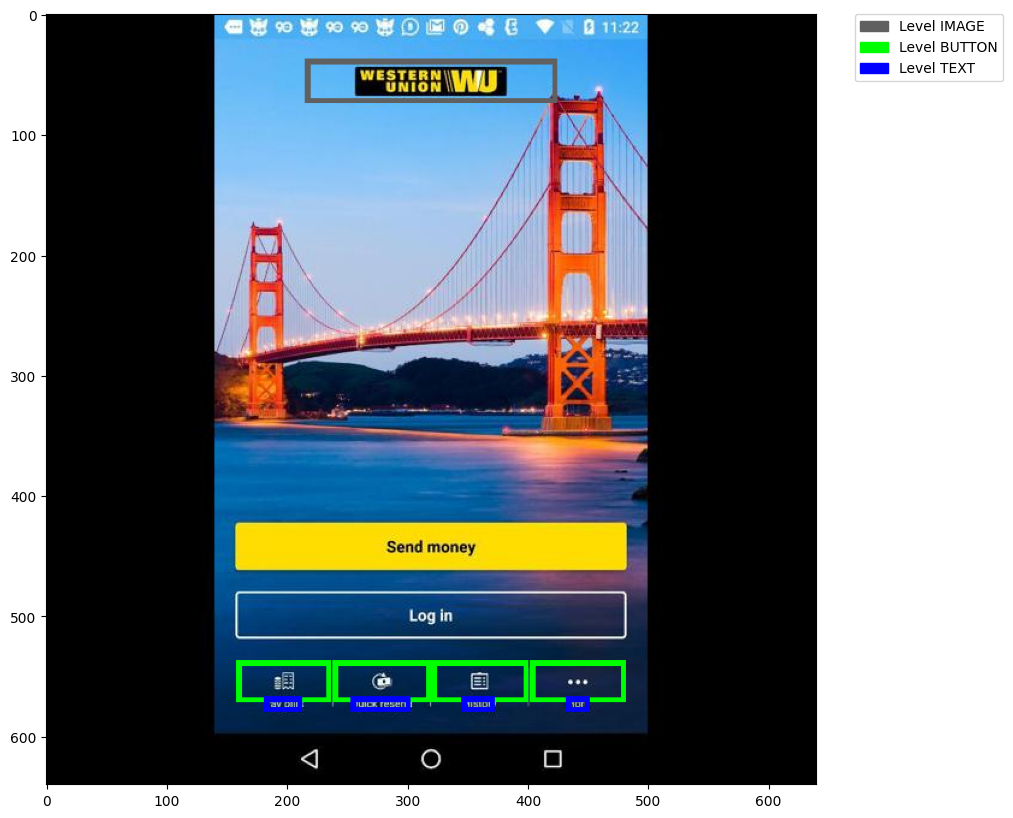

2
10000.jpg
Counter({b'TEXT': 5, b'BUTTON': 2, b'IMAGE': 1})


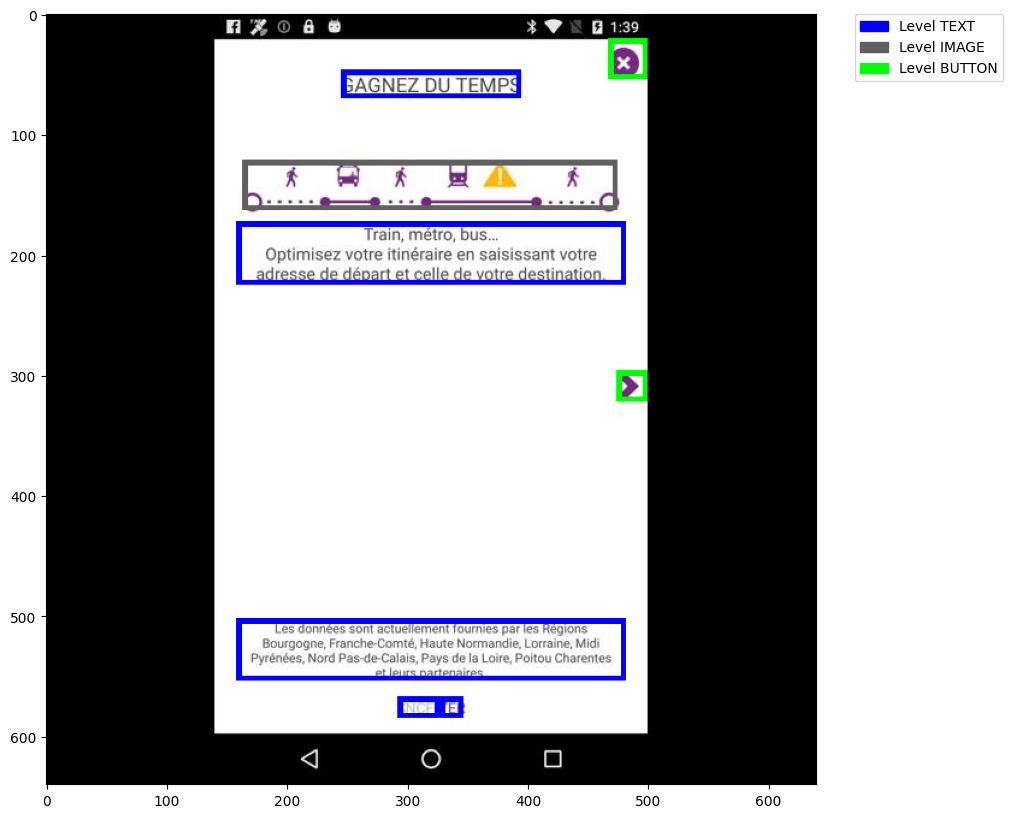

3
10002.jpg
Counter({b'TEXT': 9, b'BUTTON': 4, b'IMAGE': 2})


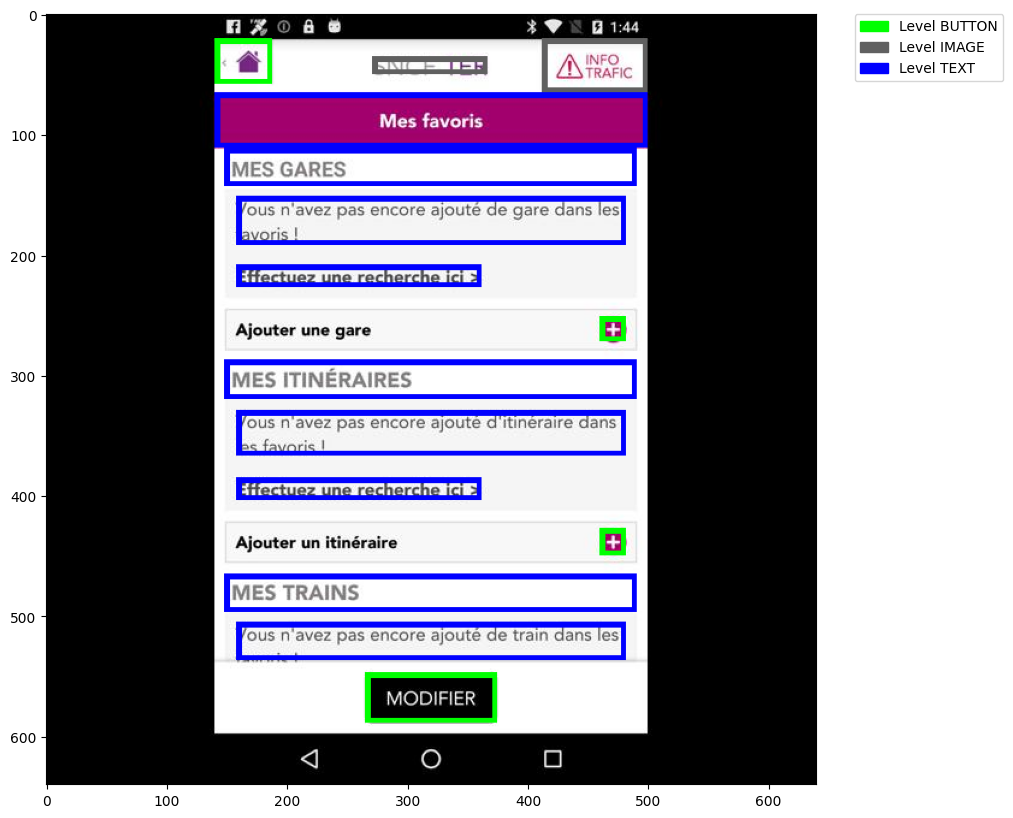

4
10004.jpg
Counter({b'TEXT': 3, b'BUTTON': 3, b'IMAGE': 1})


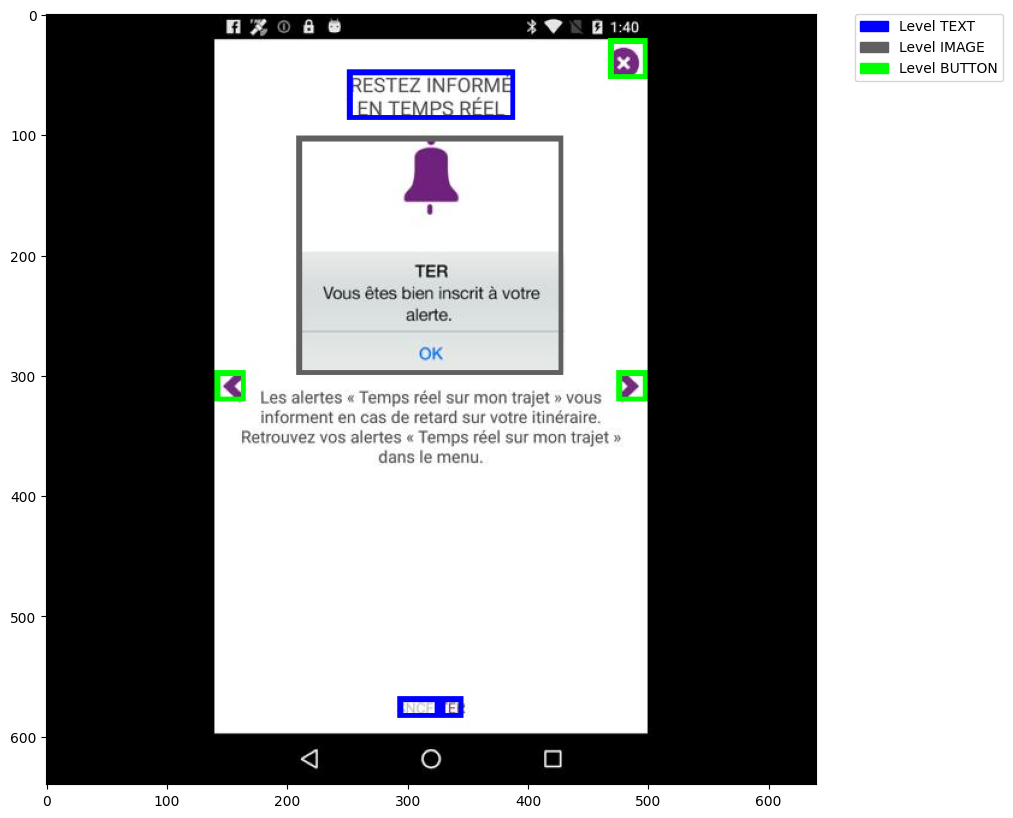

7
10011.jpg
Counter({b'BUTTON': 7, b'TEXT': 4, b'IMAGE': 3})


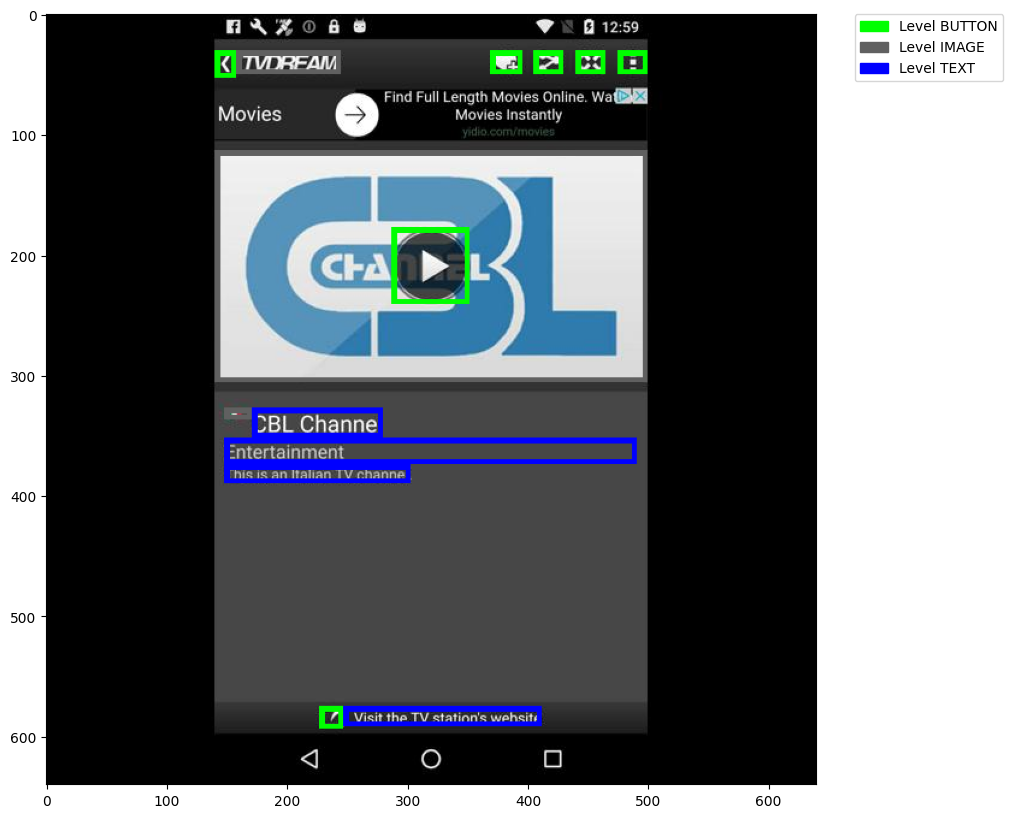

8
10012.jpg
Counter({b'TEXT': 18, b'BUTTON': 16, b'IMAGE': 8})


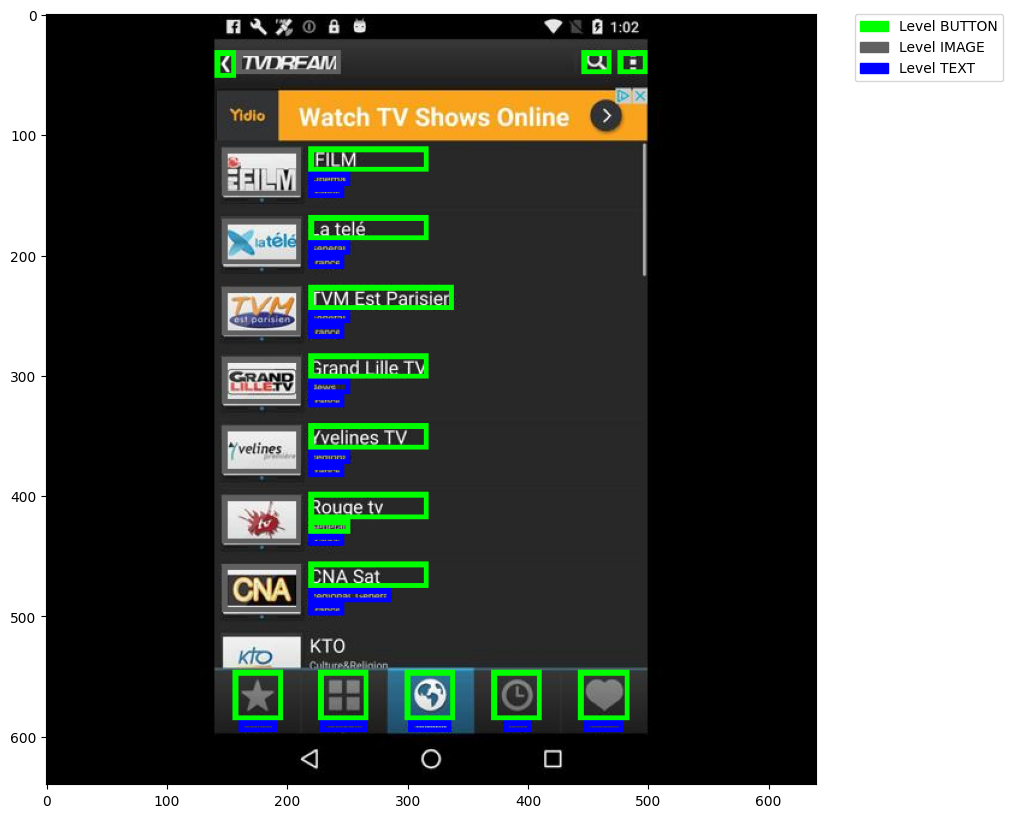

9
10013.jpg
Counter({b'BUTTON': 6, b'TEXT': 4, b'IMAGE': 2})


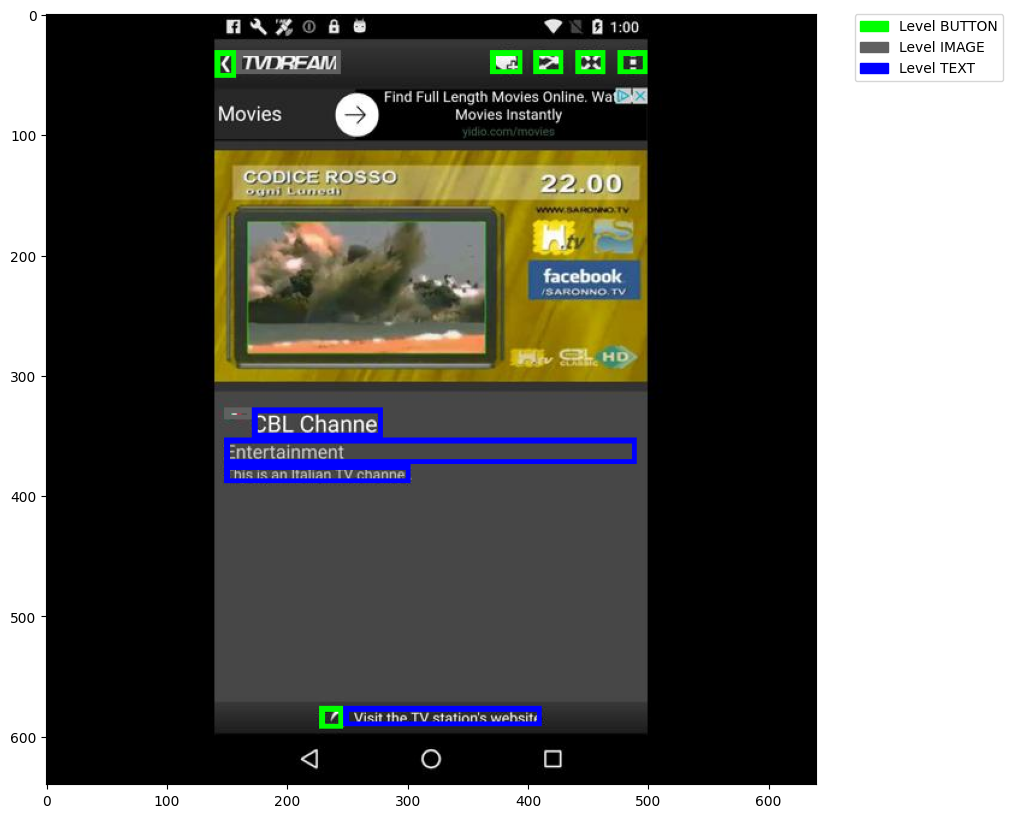

11
10015.jpg
Counter({b'BUTTON': 8, b'TEXT': 4, b'IMAGE': 1})


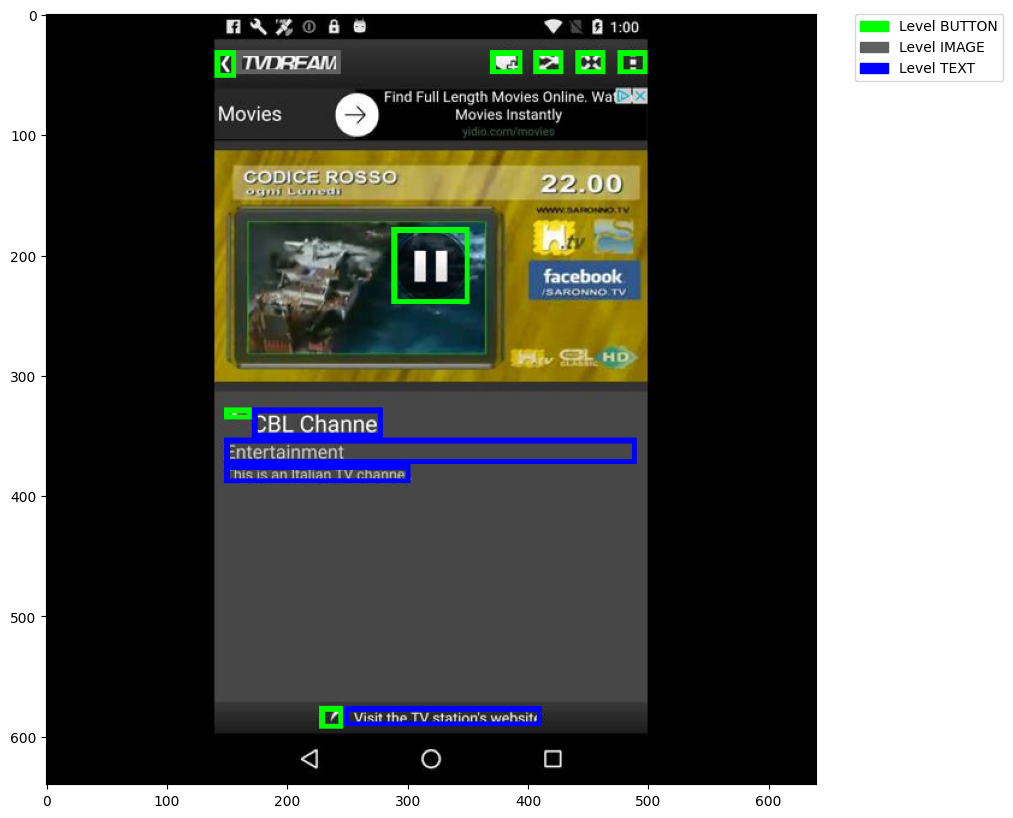

14
1002.jpg
Counter({b'TEXT': 2, b'BUTTON': 2, b'IMAGE': 1, b'TEXT_INPUT': 1})


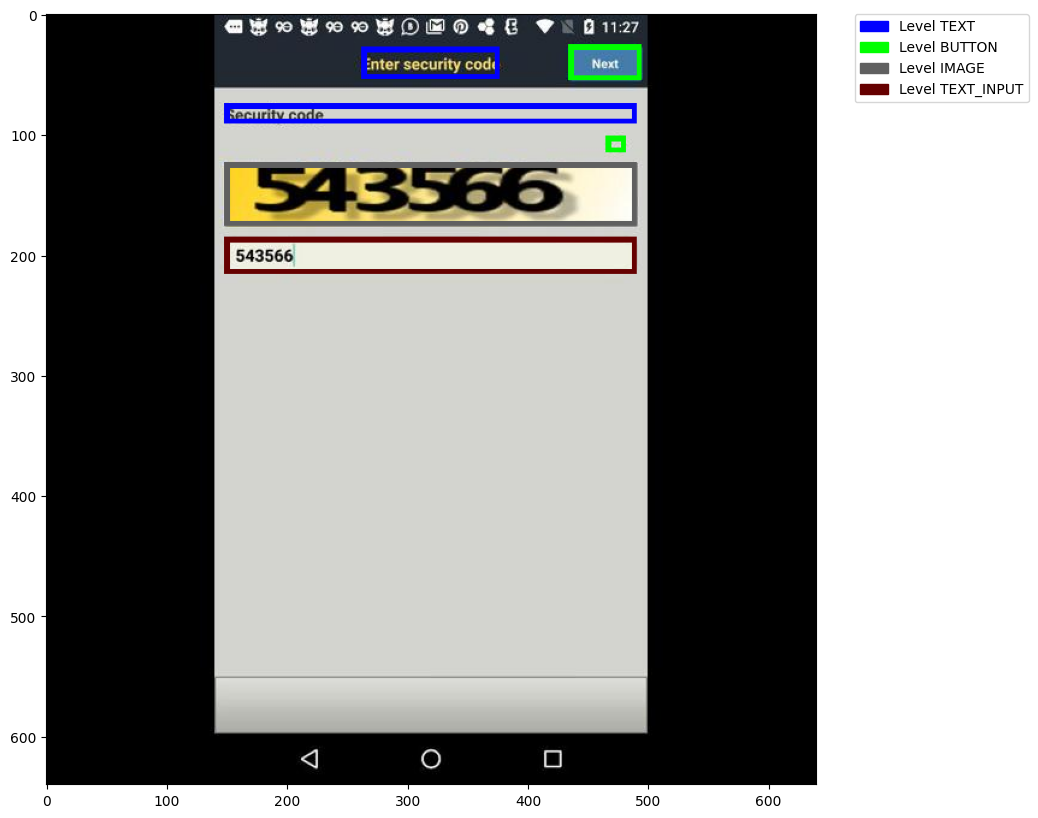

15
10020.jpg
Counter({b'BUTTON': 6, b'TEXT': 4, b'IMAGE': 3})


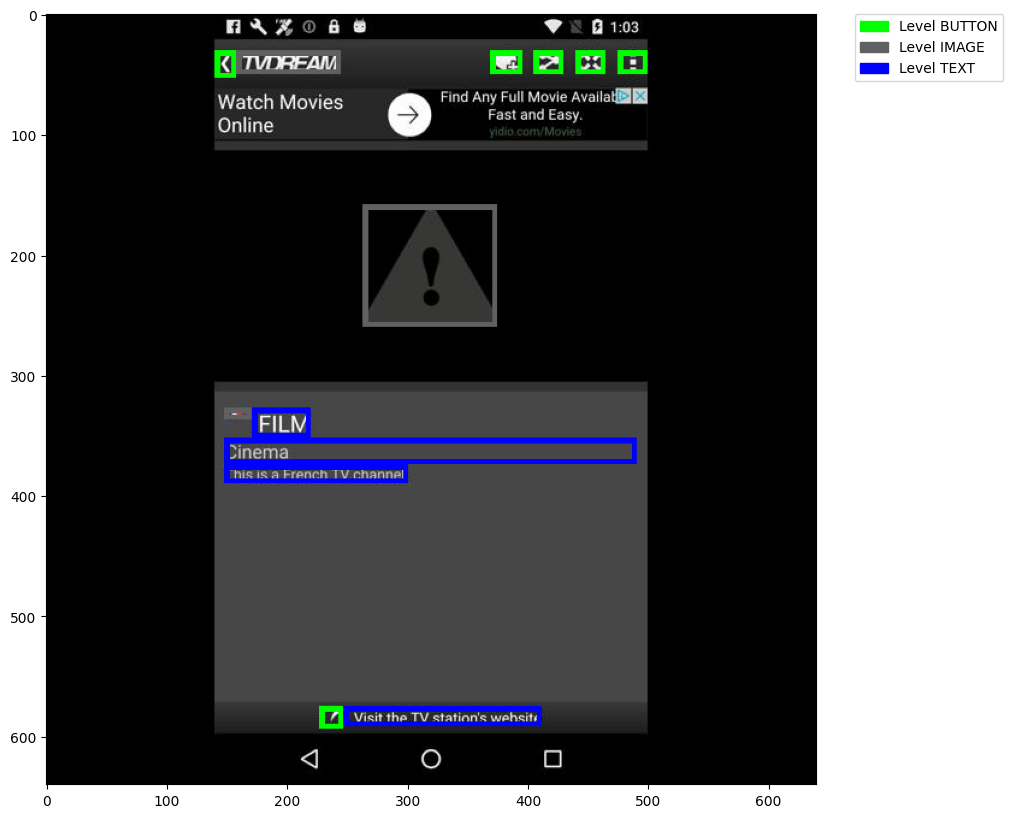

16
10021.jpg
Counter({b'BUTTON': 5, b'TEXT': 3, b'IMAGE': 2})


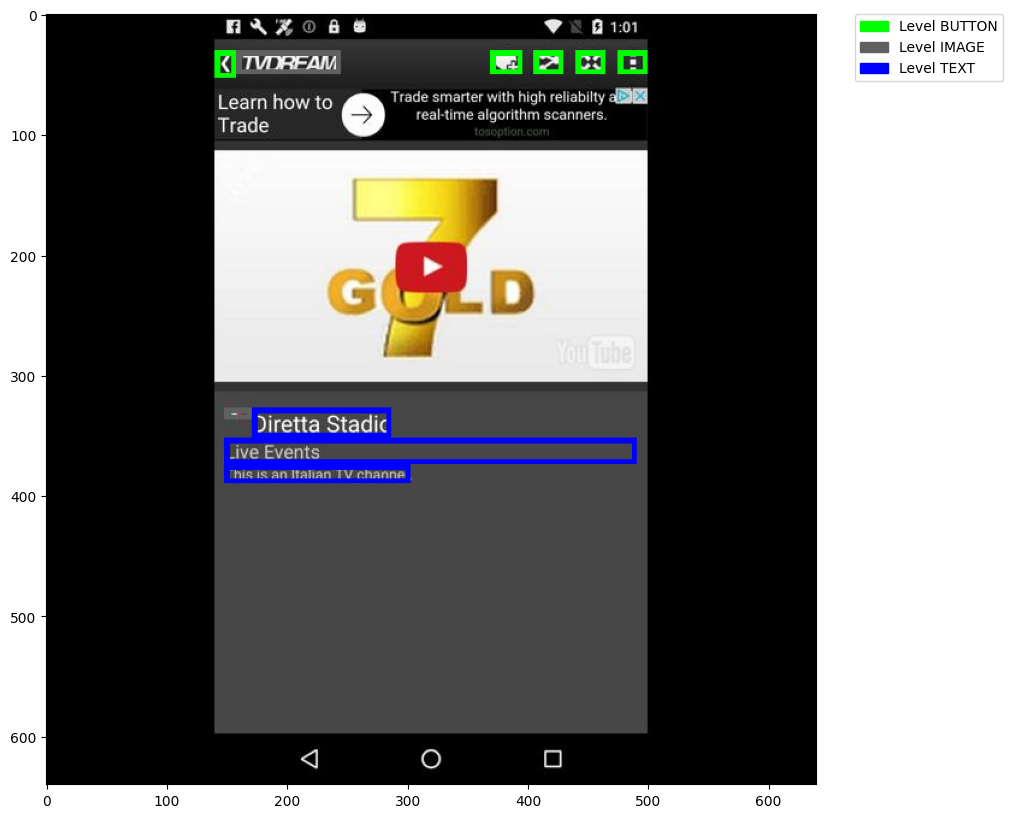

17
10022.jpg
Counter({b'BUTTON': 7, b'TEXT': 3, b'IMAGE': 2})


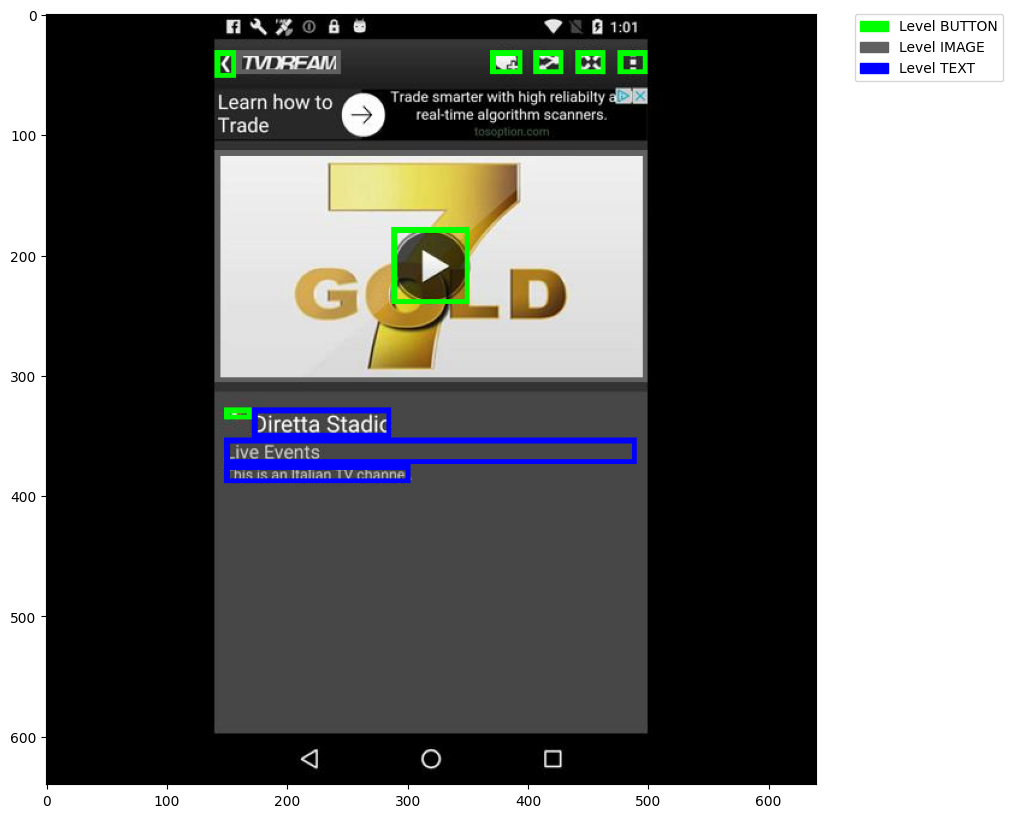

18
10023.jpg
Counter({b'BUTTON': 4, b'TEXT': 3, b'SWITCH': 2, b'MAP': 1, b'IMAGE': 1})


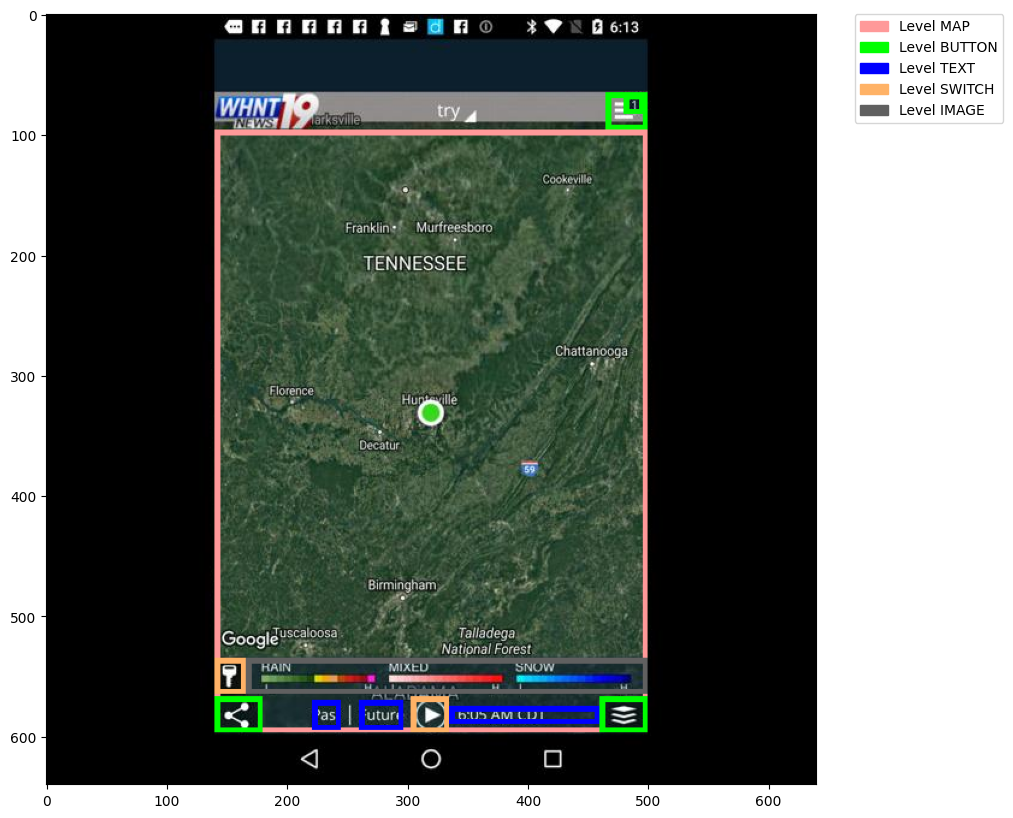

22
10027.jpg
Counter({b'TEXT': 8, b'BUTTON': 4, b'IMAGE': 2})


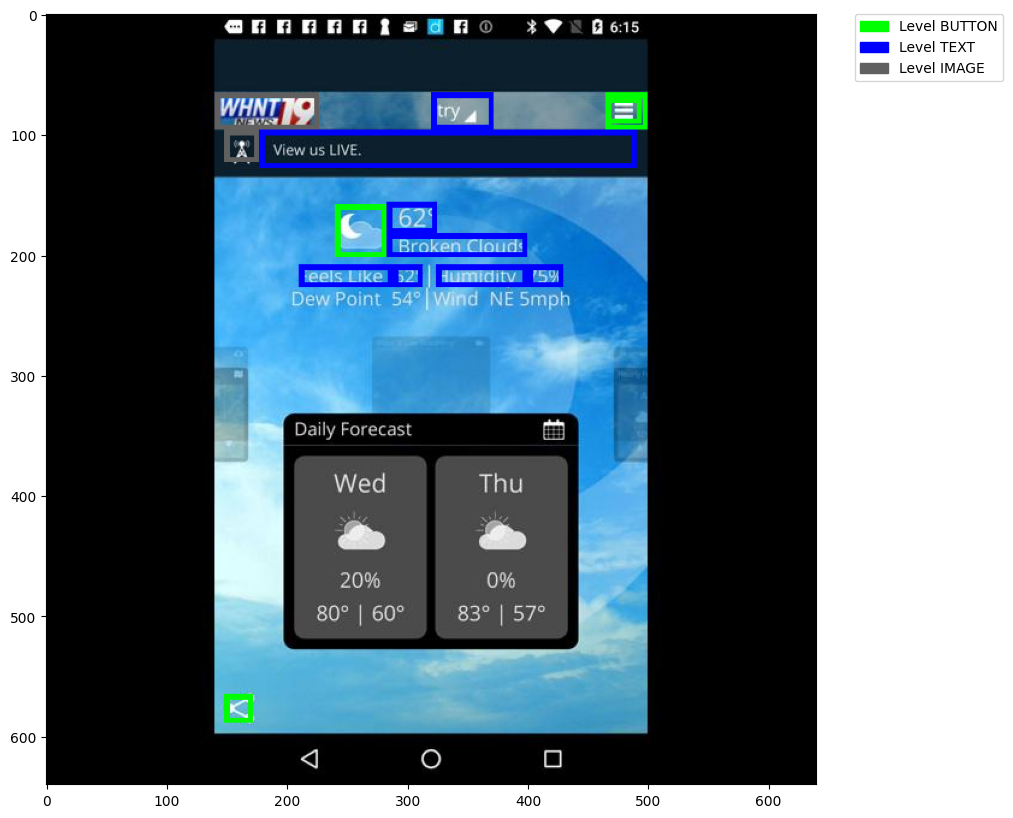

28
10032.jpg
Counter({b'BUTTON': 4, b'TEXT': 3, b'IMAGE': 1})


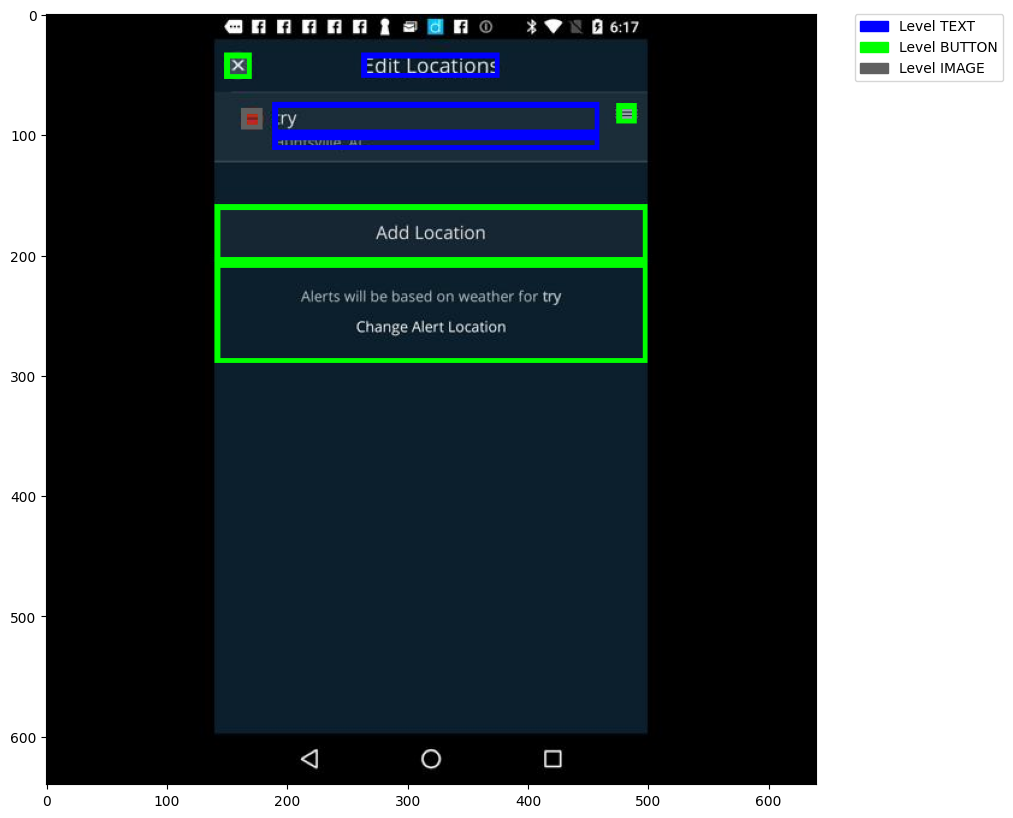

In [77]:
for obs in inds:
    N = plot_img_from_tf(raw_filtered_dataset, N = obs)
    plt.show()

In [98]:
def check_switch(name,):
    inds = []
    square = []
    for tf_rec_ind, raw_record in enumerate(raw_dataset.take(30000)):
        ex = tf.train.Example()
        ex.ParseFromString(raw_record.numpy())
        result = {}
        # example.features.feature is the dictionary
        for key, feature in ex.features.feature.items():
          # The values are the Feature objects which contain a `kind` which contains:
          # one of three fields: bytes_list, float_list, int64_list

            kind = feature.WhichOneof('kind')
            result[key] = np.array(getattr(feature, kind).value)


        objcts = [i.decode('UTF-8') for i in result['image/object/class/text']]
        img_name = result['image/filename'][0].decode('UTF-8')

        if name in objcts:
            
            # count square
            
            ind_of_switch = [ind for ind, i in enumerate(result['image/object/class/text']) if i == b'SWITCH']
            for ind in ind_of_switch:
                w = result['image/object/bbox/xmax'][ind] - result['image/object/bbox/xmin'][ind]
                h = result['image/object/bbox/ymax'][ind] - result['image/object/bbox/ymin'][ind]
                curr_s = w * h
                square.append(curr_s)
                inds.append(tf_rec_ind)

    return inds, square

In [99]:
inds, square = check_switch('SWITCH')

In [94]:
len(inds)

348

In [95]:
import matplotlib.pyplot as plt

In [100]:
square

[0.0021397567747367674,
 0.0044010429581007315,
 0.0044010429581007315,
 0.0044010429581007315,
 0.004570314461986413,
 0.004374996125697805,
 0.004791667295826585,
 0.004791667295826585,
 0.004791667295826585,
 0.004791667295826585,
 0.004991320893168449,
 0.004991320893168449,
 0.004374999602635654,
 0.0972222238779068,
 0.0013281269371510085,
 0.0013281260058271016,
 0.014036457348201026,
 0.014036460535393758,
 0.014036454161008294,
 0.014036460535393758,
 0.3818576179515928,
 0.47187498211860657,
 0.040347211920242154,
 0.035095464481921024,
 0.0043749991059298665,
 0.00437499736746183,
 0.02479166883354389,
 0.10806422680409433,
 0.011011284053739523,
 0.011011286495874018,
 0.010755209157036205,
 0.011011281611605028,
 0.010755199388498227,
 0.004171005725446264,
 0.004375003079573503,
 0.007473950990373623,
 0.004092879539562944,
 0.0019140629780789453,
 0.09218749403953552,
 0.0035937526449565382,
 0.0035937511548400636,
 0.008749993120630961,
 0.004375002800176553,
 0.0123046

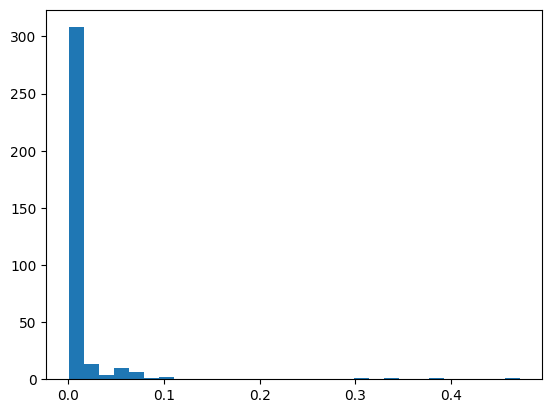

In [101]:
# distrib of SWITCH squares
plt.hist(square, bins = 30);